# To address our analysis, we need to respond to the subsequent inquiries

## Do a greater number of restaurants provide online delivery as opposed to offline services?
## Which types of restaurants are the most favored by the general public?
## What price range is preferred by couples for their dinner at restaurants?nts?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Zomato Data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [15]:
df['rate'].dtype

dtype('O')

In [16]:
def handleRate(value):
    value = str(value).split('/')
    value = float(value[0])
    return value
df['rate'] = df['rate'].apply(handleRate)

In [17]:
df['rate'].dtype

dtype('float64')

In [18]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [20]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

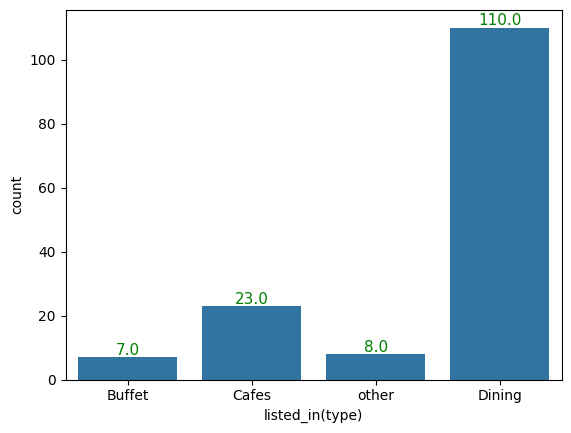

In [26]:
### The majority of the restaurants fall into the dining category.
ax = sns.countplot(x=df['listed_in(type)'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), va='center', ha='center', fontsize=11, color='green', xytext=(0, 5), textcoords='offset points')

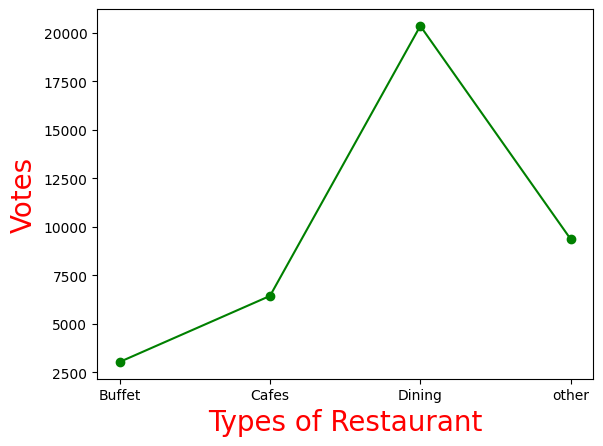

In [39]:
#Dining restaurants are preferred by a larger number of individuals.
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel("Types of Restaurant", c='red', fontsize=20)
plt.ylabel("Votes", c='red', fontsize=20)
plt.show()

In [47]:
max_votes = df['votes'].max()
def restaurant_with_max_vote():
    for i, vote in enumerate(df['votes'], start=0):
        if max_votes == vote:
            print("Total Vote Earned:", vote)
            return print("Restaurant(s) with the maximum votes:",df['name'][i])
restaurant_with_max_vote()

Total Vote Earned: 4884
Restaurant(s) with the maximum votes: Empire Restaurant


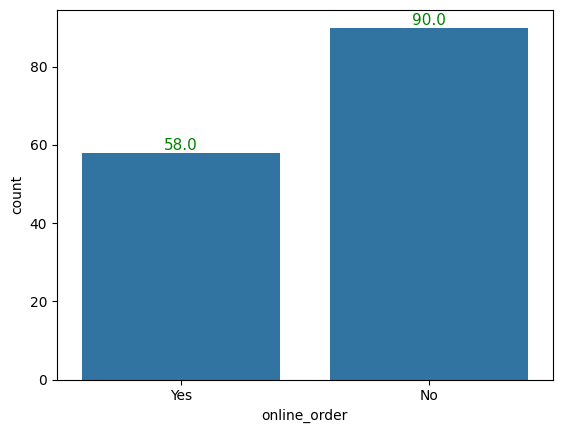

In [53]:
ax = sns.countplot(x=df['online_order'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), va='center', ha='center', color='green', fontsize=11, xytext=(0, 5), textcoords='offset points')

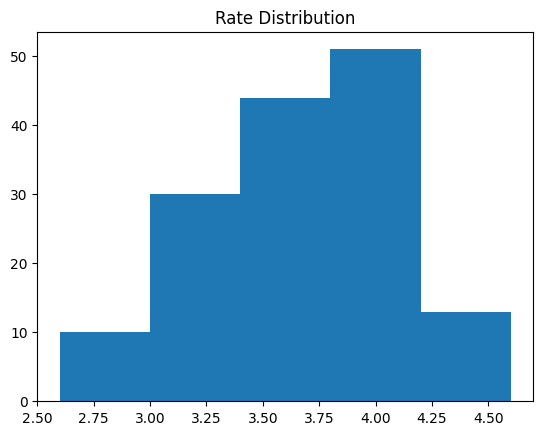

In [57]:
plt.hist(df['rate'], bins=5)
plt.title('Rate Distribution')
plt.show()

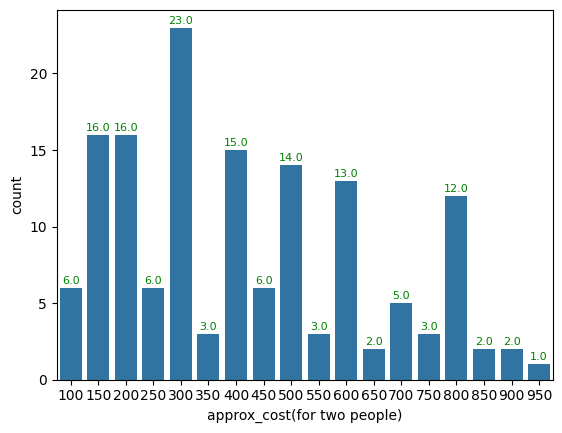

In [60]:
ax = sns.countplot(x=df['approx_cost(for two people)'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), va='center', ha='center', color='green', fontsize=8, xytext=(0, 5), textcoords='offset points')

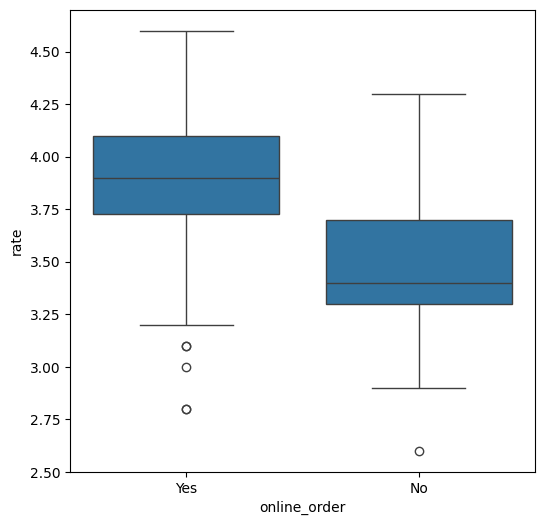

In [64]:
# whether online orders receive higher ratings than offline orders.
# Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['online_order'], y=df['rate'])
plt.show()

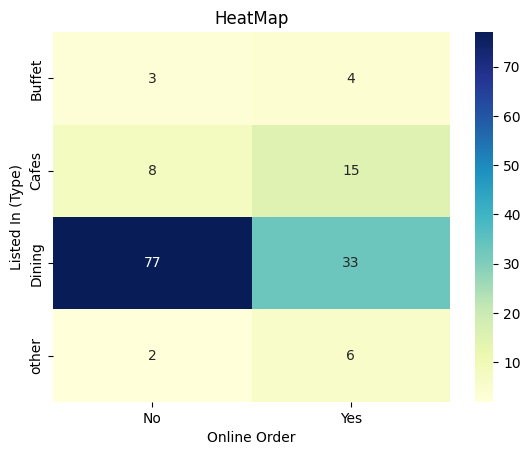

In [72]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("HeatMap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

## Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.